In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv("imdb_top_1000.csv")

# Afficher les premières lignes
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [137]:
# Afficher les infos générales
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [138]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Certificate    101
Meta_score     157
Gross          169
dtype: int64

In [139]:
# Résumé statistique des variables numériques
df.describe()


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


## Data Type Conversion

We will convert the following columns:

- **Released_Year** → to `int`
- **Gross** → to `float`
- **Runtime** → to `int`


In [140]:
# Remplacer les années non numériques par NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remplir les valeurs NaN avec la médiane et convertir en int
df['Released_Year'] = df['Released_Year'].fillna(df['Released_Year'].median()).astype(int)

# Vérifier la conversion
print(df['Released_Year'].dtype)  # Doit afficher "int64"
print(df['Released_Year'].unique()[:10])  # Afficher quelques valeurs pour vérifier


int32
[1994 1972 2008 1974 1957 2003 1993 2010 1999 2001]


In [141]:
# Remplacer les virgules et convertir en float
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# Remplacer les valeurs NaN par la médiane des revenus
#df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# Vérifier la conversion
print(df['Gross'].dtype)  # Doit afficher "float64"
print(df['Gross'].head())  # Afficher les premières valeurs


float64
0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64


In [142]:
print(df['Gross'].dtype)  # Vérifier qu'il est bien en float64
print(df['Gross'].describe())  # Voir un résumé statistique


float64
count    8.310000e+02
mean     6.803475e+07
std      1.097500e+08
min      1.305000e+03
25%      3.253559e+06
50%      2.353089e+07
75%      8.075089e+07
max      9.366622e+08
Name: Gross, dtype: float64


In [143]:
# Convertir la colonne en chaînes de caractères
df['Runtime'] = df['Runtime'].astype(str)

# Extraire les chiffres et convertir en int
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)')[0].astype(int)


# Vérifier la conversion
print(df['Runtime'].dtype)  # Doit afficher int64 ou int32 selon ton système


int32


In [144]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [145]:
print("Moyenne Meta_score:", df['Meta_score'].mean())
print("Médiane Meta_score:", df['Meta_score'].median())


Moyenne Meta_score: 77.97153024911032
Médiane Meta_score: 79.0


### Replace NaN values in Meta_score with the mean

In [146]:
# Remplacer les valeurs NaN de Meta_score par la moyenne
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

# Vérifier que toutes les valeurs manquantes ont été remplacées
print(df['Meta_score'].isnull().sum())  # Doit afficher 0


0


In [147]:
# Afficher la valeur la plus fréquente dans Certificate
print(df['Certificate'].mode()[0])


U


In [148]:
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])


In [149]:
print(df['Certificate'].isnull().sum())  # Doit afficher 0
print(df['Certificate'].value_counts())  # Vérifier la répartition des catégories


0
Certificate
U           335
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


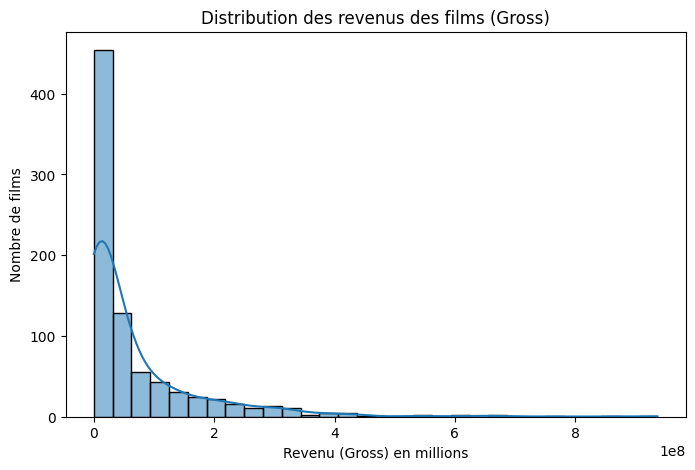

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la distribution de Gross
plt.figure(figsize=(8,5))
sns.histplot(df['Gross'], bins=30, kde=True)
plt.xlabel("Revenu (Gross) en millions")
plt.ylabel("Nombre de films")
plt.title("Distribution des revenus des films (Gross)")
plt.show()


In [151]:
# Calculer la corrélation entre Gross et No_of_Votes
correlation = df[['Gross', 'IMDB_Rating']].corr()
print(correlation)


                Gross  IMDB_Rating
Gross        1.000000     0.095923
IMDB_Rating  0.095923     1.000000


In [152]:
# Supprimer les films où Gross est manquant
df = df.dropna(subset=['Gross'])

# Vérifier la nouvelle taille du dataset
print(f"Nombre de films restants : {df.shape[0]}")  # Doit afficher 831


Nombre de films restants : 831


In [153]:
# Vérifier combien de films ont encore Gross manquant
print(df['Gross'].isnull().sum())  


0


In [154]:
# Vérifier le type de la colonne Gross
print(df['Gross'].dtype)


float64


In [155]:
# Supprimer les films où Gross est NaN
df = df.dropna(subset=['Gross'])

# Vérifier le nombre de films restants
print(f"Nombre de films restants : {df.shape[0]}")


Nombre de films restants : 831


In [156]:
print(df['Gross'].isnull().sum())  # Doit afficher 0


0


In [157]:
# Vérifier les valeurs uniques dans Gross
print(df['Gross'].unique()[:20])  # Affiche les 20 premières valeurs uniques


[2.83414690e+07 1.34966411e+08 5.34858444e+08 5.73000000e+07
 4.36000000e+06 3.77845905e+08 1.07928762e+08 9.68988180e+07
 2.92576195e+08 3.70301020e+07 3.15544750e+08 3.30252182e+08
 6.10000000e+06 3.42551365e+08 1.71479930e+08 4.68363940e+07
 2.90475067e+08 1.12000000e+08 5.33678440e+07 1.88020017e+08]


In [158]:
print(df['Gross'].value_counts().head(10))  # Voir les valeurs les plus fréquentes


Gross
4360000.0     5
25000000.0    2
5450000.0     2
5321508.0     2
9600000.0     2
28341469.0    1
1436000.0     1
57504069.0    1
61276872.0    1
52096475.0    1
Name: count, dtype: int64


In [159]:
# Trouver la médiane de Gross (déjà connue : 23,530,892)
median_gross = 23530892.0  

# Supprimer les films ayant cette valeur de Gross
df = df[df['Gross'] != median_gross]

# Vérifier le nombre de films restants
print(f"Nombre de films restants après suppression : {df.shape[0]}")


Nombre de films restants après suppression : 830


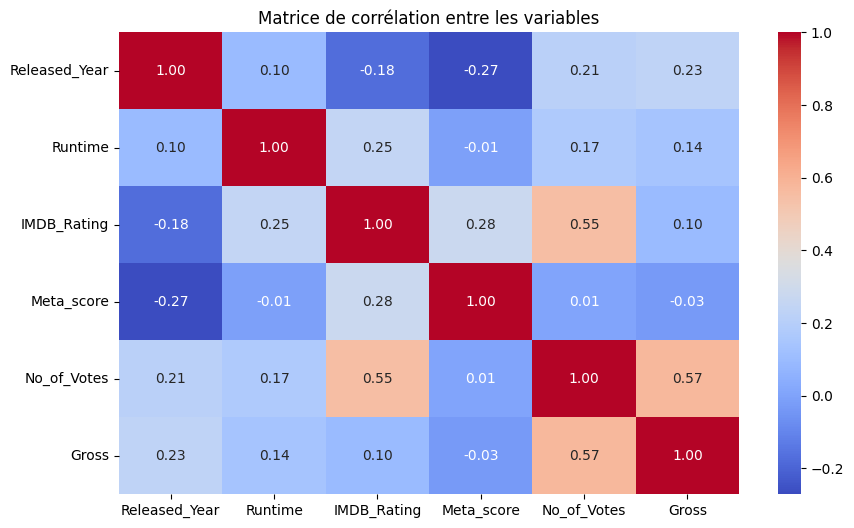

In [160]:
# Sélectionner uniquement les colonnes numériques pour éviter les erreurs
df_numeric = df.select_dtypes(include=['number'])

# Matrice de corrélation propre
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.show()


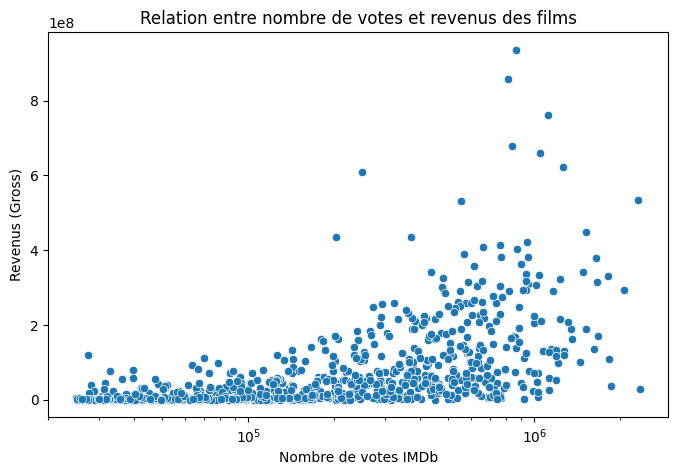

In [161]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['No_of_Votes'], y=df['Gross'])
plt.xscale("log")  # Échelle logarithmique pour mieux voir les tendances
plt.xlabel("Nombre de votes IMDb")
plt.ylabel("Revenus (Gross)")
plt.title("Relation entre nombre de votes et revenus des films")
plt.show()


C:\Users\MSI GS65 9SF\AppData\Local\Temp\ipykernel_8996\2979491202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="coolwarm")


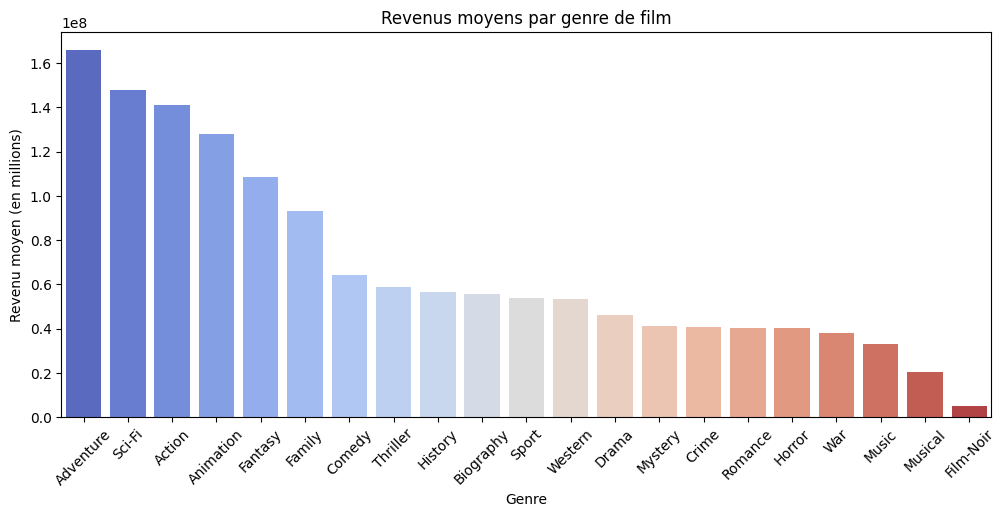

In [162]:
# Séparer les films en genres multiples
df_exploded = df.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')  # Diviser les genres multiples
df_exploded = df_exploded.explode('Genre')  # Séparer chaque film par genre

# Calculer le revenu moyen par genre
genre_revenue = df_exploded.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(12,5))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Revenu moyen (en millions)")
plt.title("Revenus moyens par genre de film")
plt.show()


C:\Users\MSI GS65 9SF\AppData\Local\Temp\ipykernel_8996\1213624305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="magma")


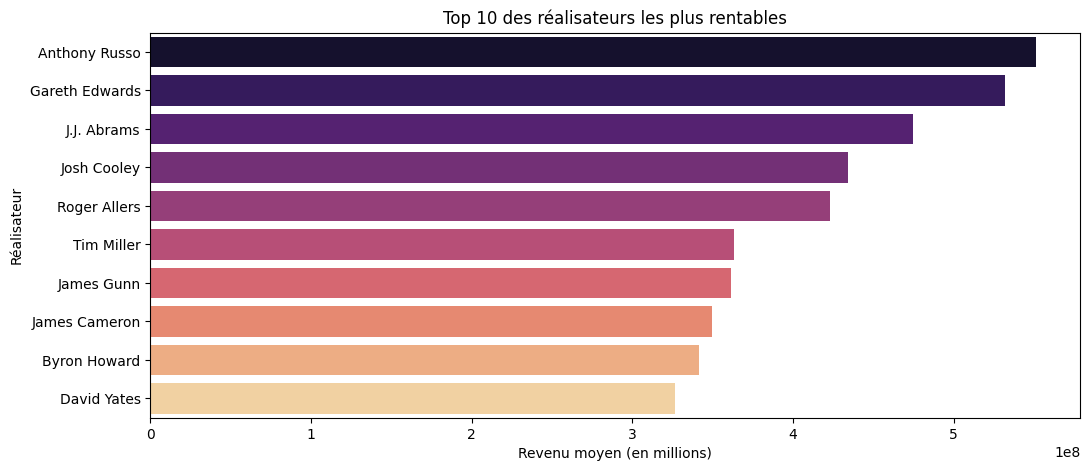

In [163]:
# Calculer le revenu moyen par réalisateur
director_revenue = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)

# Visualisation
plt.figure(figsize=(12,5))
sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="magma")
plt.xlabel("Revenu moyen (en millions)")
plt.ylabel("Réalisateur")
plt.title("Top 10 des réalisateurs les plus rentables")
plt.show()


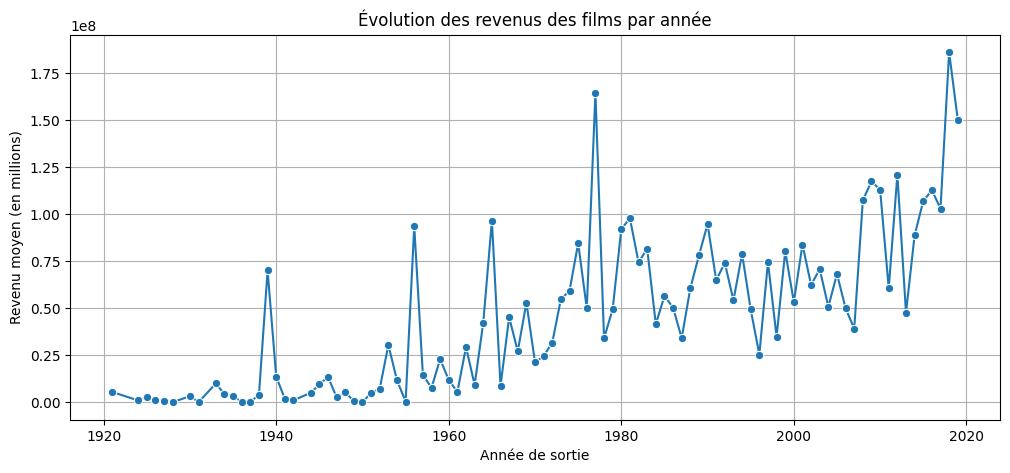

In [164]:
# Regrouper les revenus moyens par année
yearly_revenue = df.groupby('Released_Year')['Gross'].mean()

# Visualisation
plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o")
plt.xlabel("Année de sortie")
plt.ylabel("Revenu moyen (en millions)")
plt.title("Évolution des revenus des films par année")
plt.grid()
plt.show()


### Encoding of Categorical Variables

In [165]:
# Encodage One-Hot de Genre et Certificate
df = pd.get_dummies(df, columns=['Genre', 'Certificate'], drop_first=True)

In [166]:
# Créer une nouvelle variable encodée : revenu moyen par réalisateur
director_mean_gross = df.groupby('Director')['Gross'].mean()

# Remplacer chaque réalisateur par sa moyenne
df['Director_encoded'] = df['Director'].map(director_mean_gross)

# Supprimer la colonne d’origine
df.drop('Director', axis=1, inplace=True)


In [167]:
# Fusionner les 4 stars en une seule liste par film
df['All_Stars'] = df[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()

# Aplatir en une seule colonne "acteur par ligne"
from collections import defaultdict

# Créer un dico acteur → revenu moyen
star_gross = defaultdict(list)
for idx, row in df.iterrows():
    for star in row['All_Stars']:
        star_gross[star].append(row['Gross'])

# Moyenne du revenu pour chaque acteur
star_mean = {star: sum(values)/len(values) for star, values in star_gross.items()}

# Moyenne des 4 stars pour chaque film
def star_avg(stars):
    return sum(star_mean.get(s, 0) for s in stars) / 4

df['Stars_encoded'] = df['All_Stars'].apply(star_avg)

# Supprimer les colonnes d'origine
df.drop(['Star1', 'Star2', 'Star3', 'Star4', 'All_Stars'], axis=1, inplace=True)


## Removal of columns that are not useful for modeling

In [168]:
# Supprimer les colonnes non utiles pour la modélisation
df.drop(['Series_Title', 'Overview', 'Poster_Link','Meta_score','IMDB_Rating'], axis=1, inplace=True)

# Vérification
print(df.columns)


Index(['Released_Year', 'Runtime', 'No_of_Votes', 'Gross',
       'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror',
       ...
       'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
       'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A',
       'Certificate_UA', 'Certificate_Unrated', 'Director_encoded',
       'Stars_encoded'],
      dtype='object', length=199)


## Normalization of numerical variables

In [169]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques à normaliser
num_cols = ['Released_Year', 'Runtime', 'No_of_Votes', 'Director_encoded', 'Stars_encoded']

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la transformation
df[num_cols] = scaler.fit_transform(df[num_cols])

# Vérification
df[num_cols].describe()


,Released_Year,Runtime,No_of_Votes,Director_encoded,Stars_encoded
count,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02,8.300000e+02
mean,-4.580004e-15,-1.712151e-17,-6.848605e-17,1.284113e-17,6.420567e-18
std,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00,1.000603e+00
min,-3.450172e+00,-2.875576e+00,-8.443015e-01,-7.155519e-01,-8.137481e-01
25%,-4.690346e-01,-7.302188e-01,-7.095209e-01,-6.692989e-01,-7.316749e-01
50%,2.880797e-01,-1.484270e-01,-3.764855e-01,-3.929606e-01,-3.171440e-01
75%,7.612762e-01,5.060888e-01,3.821330e-01,2.214948e-01,2.915476e-01
max,1.187153e+00,4.287735e+00,5.901121e+00,5.077826e+00,7.088795e+00


## Training Regression Models

In [170]:
# Définir la variable cible (ce qu'on veut prédire)
y = df['Gross']

# Définir les variables explicatives (features)
X = df.drop('Gross', axis=1)


In [171]:
from sklearn.model_selection import train_test_split

# Étape 1 : séparer train (70%) et temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# Étape 2 : séparer validation (50% de temp = 15% du total) et test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [172]:
from sklearn.linear_model import LinearRegression

# Initialiser le modèle
model = LinearRegression()

# Entraîner sur les données d'entraînement
model.fit(X_train, y_train)


LinearRegression()

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédire sur le jeu de validation
y_val_pred = model.predict(X_val)

# Calcul des métriques
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"[Validation] MAE  : {mae_val:,.2f}")
print(f"[Validation] RMSE : {rmse_val:,.2f}")
print(f"[Validation] R²   : {r2_val:.4f}")


[Validation] MAE  : 15,700,322,464,455,194,624.00
[Validation] RMSE : 63,751,664,903,285,334,016.00
[Validation] R²   : -434689569671497323118592.0000


### Problem with the distribution of the target variable `Gross`

During the training of the linear regression model, the evaluation metrics (MAE, RMSE, R²) became abnormal with extremely high values. This is mainly due to the **highly skewed distribution** of the `Gross` variable, which contains **extreme values** (blockbusters) that have a **disproportionate impact** on the model.

#### Solution: Logarithmic transformation of `Gross`

To fix this issue, we apply a **logarithmic transformation** to the target variable in order to:

- Reduce the effect of outliers.
- Make the distribution closer to a normal distribution.
- Stabilize the regression model.


In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#  1. Transformation log de la cible
df['log_Gross'] = np.log(df['Gross'] + 1)  # +1 pour éviter log(0)

# ------------------------------
# 2. Définir X et y
y = df['log_Gross']
X = df.drop(columns=['Gross', 'log_Gross'])

# ------------------------------
#  3. Split en train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ------------------------------
# 4. Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
#  5. Prédiction sur validation + inverse du log
y_val_pred_log = model.predict(X_val)

#  Clamp pour éviter l'overflow dans exp()
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Inverser la transformation log
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1  # On inverse la vérité terrain


#  6. Évaluation du modèle
mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Validation] MAE  : {mae:,.2f}")
print(f"[Validation] RMSE : {rmse:,.2f}")
print(f"[Validation] R²   : {r2:.4f}")


[Validation] MAE  : 4,843,855,331.19
[Validation] RMSE : 18,323,735,963.95
[Validation] R²   : -35909.7279


# Linear Regression on log(Gross)

We trained a linear regression model using a logarithmic transformation of the target variable `Gross`.  
This transformation was necessary because the distribution of movie revenues is highly skewed.

Even though the error metrics (`MAE`, `RMSE`) are now on a realistic scale, the **R² coefficient is extremely negative**, which means:

- The linear model **does not explain the variance** in revenues.
- It **fails to capture the complex relationships** between the explanatory variables and `Gross`.

We will now test a more flexible model: **Random Forest Regressor**, which can better handle non-linear relationships and interactions between variables.


In [180]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraîner
rf_model.fit(X_train, y_train)

# Prédire (log scale)
y_val_pred_log = rf_model.predict(X_val)
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Retour à l’échelle réelle
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1

# Évaluation
mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Random Forest - Validation]")
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")


[Random Forest - Validation]
MAE  : 14,496,426.80
RMSE : 34,456,386.37
R²   : 0.8730


## Model Optimization

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Définir la grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Initialiser le modèle de base
rf = RandomForestRegressor(random_state=42)

# GridSearch avec validation croisée 3-fold
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,  # parallélisation
                           verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("🎯 Meilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
🎯 Meilleurs hyperparamètres trouvés :
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [186]:
# Prédiction en log
y_val_pred_log = best_model.predict(X_val)
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Retour à l’échelle originale
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1

# Évaluation

mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Optimisé - Validation]")
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R²   : {r2:.4f}")


[Optimisé - Validation]
MAE  : 14,455,614.92
RMSE : 34,857,261.44
R²   : 0.8700


## Final Evaluation


In [187]:
# Prédictions sur le jeu de test final
y_test_pred_log = best_model.predict(X_test)
y_test_pred_log = np.clip(y_test_pred_log, None, 25)

# Retour à l’échelle d’origine
y_test_pred = np.exp(y_test_pred_log) - 1
y_test_true = np.exp(y_test) - 1

# Évaluation finale
mae_test = mean_absolute_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
r2_test = r2_score(y_test_true, y_test_pred)

print("\n [Test Final]")
print(f"MAE  : {mae_test:,.2f}")
print(f"RMSE : {rmse_test:,.2f}")
print(f"R²   : {r2_test:.4f}")



 [Test Final]
MAE  : 18,135,556.21
RMSE : 40,056,388.67
R²   : 0.8642


### Problem with the distribution of the target variable `Gross`

During the training of the linear regression model, the evaluation metrics (MAE, RMSE, R²) became abnormal with extremely high values.  
This is mainly due to the **highly skewed distribution** of the `Gross` variable, which contains **extreme values** (blockbusters) that have a **disproportionate impact** on the model.

#### Solution: Logarithmic transformation of `Gross`

To fix this issue, we apply a **logarithmic transformation** to the target variable in order to:

- Reduce the effect of outliers.  
- Make the distribution closer to a normal distribution.  
- Stabilize the regression model.


In [189]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Prépare tes données comme précédemment (X_train, y_train en log, etc.)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_

# Prédire et revenir à l'échelle réelle
y_val_pred_log_xgb = best_xgb.predict(X_val)
y_val_pred_log_xgb = np.clip(y_val_pred_log_xgb, a_min=None, a_max=25)
y_val_pred_xgb = np.exp(y_val_pred_log_xgb) - 1
y_val_true = np.exp(y_val) - 1

# Évaluation


mae_xgb = mean_absolute_error(y_val_true, y_val_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val_true, y_val_pred_xgb))
r2_xgb = r2_score(y_val_true, y_val_pred_xgb)

print("XGBoost - Validation")
print(f"MAE  : {mae_xgb:,.2f}")
print(f"RMSE : {rmse_xgb:,.2f}")
print(f"R²   : {r2_xgb:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
XGBoost - Validation
MAE  : 15,528,501.98
RMSE : 38,220,322.83
R²   : 0.8438


### Final Comparison: Random Forest vs XGBoost

After training and validation, here are the results for both models:

| Model         | MAE        | RMSE       | R²      |
|---------------|------------|------------|---------|
| Random Forest | **14.45 M** | **34.86 M** | **0.8700** |
| XGBoost       | 15.53 M    | 38.22 M    | 0.8438 |

The **Random Forest** model remains the **most effective** on this dataset.  
It provides the **best predictions**, with a good balance between accuracy (MAE), stability (RMSE), and overall performance (R²).

We will therefore **keep Random Forest as the final model**.


In [191]:
import joblib

# Exporter le modèle
joblib.dump(best_model, 'best_random_forest_model.pkl')



['best_random_forest_model.pkl']

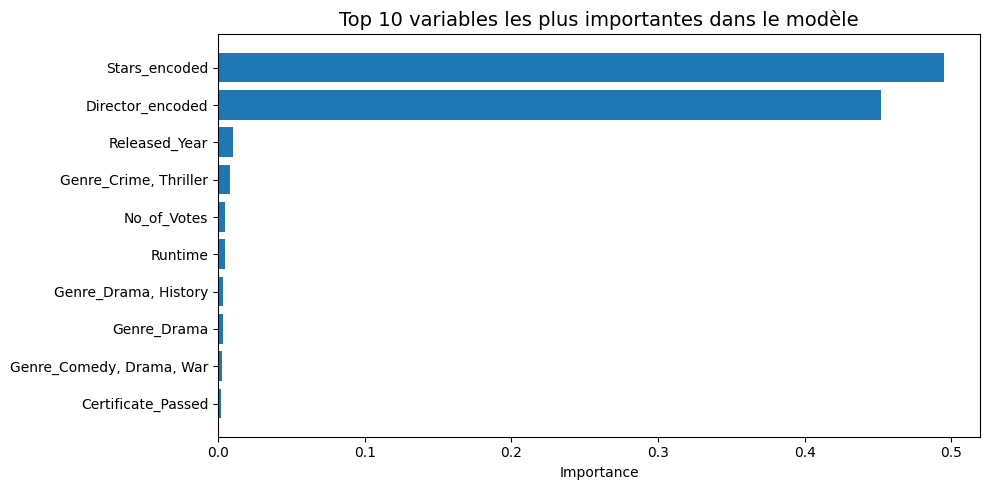

In [193]:
# Obtenir les importances
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Nombre de variables à afficher
top_n = 10
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Tracer
plt.figure(figsize=(10, 5))
plt.title(f"Top {top_n} variables les plus importantes dans le modèle", fontsize=14)
plt.barh(range(top_n), top_importances[::-1], align='center')  # inverser pour mettre la + importante en haut
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


### Interpretation of the Most Important Features

The chart above shows the **10 most influential features** in the Random Forest model used to predict a movie’s revenue (`Gross`).

The two **dominant features** are:

1. **Stars_encoded** → This is the most important variable.  
   > This means that **the main actors have a huge impact** on a movie’s financial success.  
   Well-known or “bankable” actors attract more viewers, which increases revenue.

2. **Director_encoded** → Right behind the stars.  
   > Some directors (e.g., Christopher Nolan, James Cameron…) have a **proven ability to generate high revenue**, regardless of the movie.

The other features are much less important but still give interesting insights:
- **Released_Year** → More recent movies have a small advantage.
- **Genre combinations** such as `Crime, Thriller` or `Drama, History` → have a small influence on revenue.
- **No_of_Votes** → Surprisingly low here, probably **correlated with Stars and Director**.
- **Runtime** → Very small impact.
- **Certificate_Passed** → Marginal influence.

### Conclusion
The model shows that **box-office success is mainly driven by the people involved** in the movie, especially the **actors** and the **director**.

Characteristics such as genre, runtime, or release year have a **secondary impact**.
